# Max-cut Problem with 12 nodes: 
### Split a graph into two subsets with the largest cut.

The maximum-cut problem (MAX-CUT) was the first application described in the original QAOA (quantum-approximate-optimization-algorithm paper) [1]. The goal of this problem is to partition the nodes of a graph into two sets such that the number of edges connecting nodes in opposite sets is maximized.

### Implementation

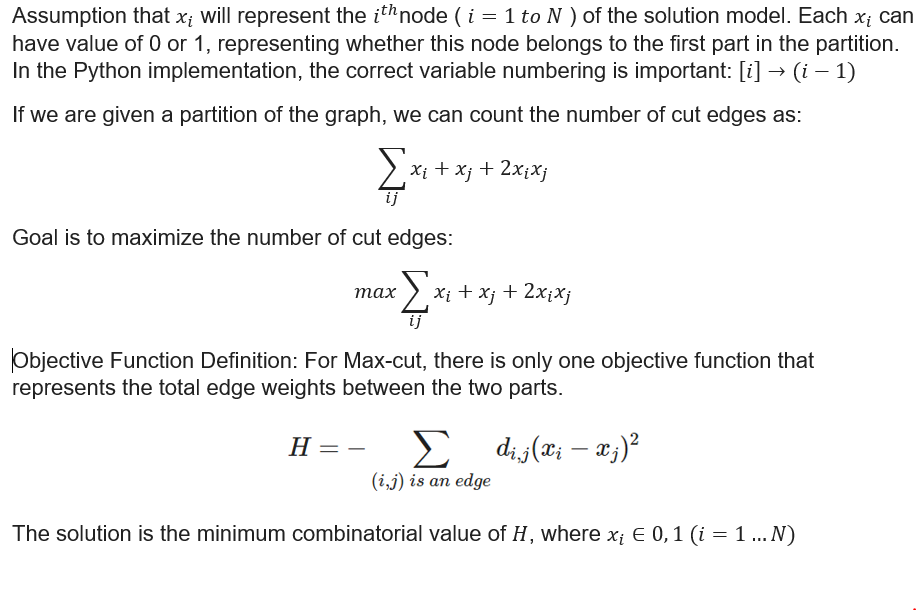

#### References:

     1. https://grove-docs.readthedocs.io/en/latest/qaoa.html
     2. https://github.com/rigetti/grove/blob/master/grove/pyqaoa/maxcut_qaoa.py#L89
     3. VQE Tutorial: https://github.com/DavitKhach/quantum-algorithms-tutorials
     4. http://docs.rigetti.com/en/v2.0.0/wavefunction_simulator.html


#### Acknowledgment: Many Thanks to Amy Brown of Rigetti for pointers to the grove and VQE repository.

### Notes and comments: The following code needs to be cleaned up and properly commented which I have been unable to do due to lack of time in meeting the deadline.

In [57]:
## maxcut_qaoa.py implements the cost function for MAX-CUT problems
## import the packages and connect to QVM

from pyquil import Program, get_qc
from pyquil.gates import *
import networkx as nx
import numpy as np
from pyquil.paulis import PauliTerm, PauliSum
from scipy.optimize import minimize
from grove.pyqaoa.maxcut_qaoa import maxcut_qaoa
from pyquil.api import WavefunctionSimulator
from pyquil.gates import H
from pyquil.paulis import sI, sX, sZ, exponentiate_commuting_pauli_sum
import matplotlib.pylab as plt
import pyquil.api as api
qvm_connection = api.QVMConnection()

In [58]:
## Generate a graph
steps = 2
graphs = [(0,6),(0,7),(0,8),(0,9),(0,10),(0,11),
(1,6),(1,7),(1,8),(1,9),(1,10),(1,11),
(2,6),(2,7),(2,8),(2,9),(2,10),(2,11),
(3,6),(3,7),(3,8),(3,9),(3,10),(3,11),
(4,6),(4,7),(4,8),(4,9),(4,10),(4,11),
(5,6),(5,7),(5,8),(5,9),(5,10),(5,11)]

inst = maxcut_qaoa(graph=graphs, steps=steps)
opt_betas, opt_gammas = inst.get_angles()

                     models will be ineffective
	Parameters: [0.31025357 0.29437715 3.24826729 3.55145572] 
	E => -21.88578993194745
	Parameters: [0.31025357 0.29437715 3.24826729 3.55145572] 
	E => -23.466930272979027
	Parameters: [0.31025357 0.29437715 3.24826729 3.55145572] 
	E => -24.278399296921737
	Parameters: [0.30734495 0.29713694 3.35460938 3.35168634] 
	E => -23.533986472888618
	Parameters: [0.29425612 0.30219655 3.36911057 3.51816083] 
	E => -25.017113593125806
	Parameters: [0.3114655  0.29690696 3.41019728 3.45712018] 
	E => -25.706903678079296
	Parameters: [0.3114655  0.29690696 3.41019728 3.45712018] 
	E => -25.817616735655125
	Parameters: [0.3114655  0.29690696 3.41019728 3.45712018] 
	E => -24.97287651231148
	Parameters: [0.3114655  0.29690696 3.41019728 3.45712018] 
	E => -25.614252884305095
	Parameters: [0.3114655  0.29690696 3.41019728 3.45712018] 
	E => -25.690671790213024
	Parameters: [0.3114655  0.29690696 3.41019728 3.45712018] 
	E => -25.89108383929159
	Paramete

In [59]:
t = np.hstack((opt_betas, opt_gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(t)
wf = WavefunctionSimulator().wavefunction(prog)
wf = wf.amplitudes

In [60]:
for state_index in range(inst.nstates):
    print(inst.states[state_index], np.conj(wf[state_index]) * wf[state_index])

000000000000 (0.000201053998607811+0j)
000000000001 (7.261428297499635e-05+0j)
000000000010 (7.261428297499658e-05+0j)
000000000011 (8.853663488038243e-07+0j)
000000000100 (7.261428297499682e-05+0j)
000000000101 (8.853663488038193e-07+0j)
000000000110 (8.853663488038117e-07+0j)
000000000111 (0.00010857914091132854+0j)
000000001000 (7.261428297499701e-05+0j)
000000001001 (8.853663488038278e-07+0j)
000000001010 (8.853663488038249e-07+0j)
000000001011 (0.00010857914091132835+0j)
000000001100 (8.853663488037924e-07+0j)
000000001101 (0.00010857914091132841+0j)
000000001110 (0.00010857914091132835+0j)
000000001111 (0.0005001982505590442+0j)
000000010000 (7.261428297499712e-05+0j)
000000010001 (8.853663488038301e-07+0j)
000000010010 (8.85366348803804e-07+0j)
000000010011 (0.00010857914091132874+0j)
000000010100 (8.853663488037937e-07+0j)
000000010101 (0.00010857914091132897+0j)
000000010110 (0.00010857914091132847+0j)
000000010111 (0.0005001982505590454+0j)
000000011000 (8.853663488037973e-07

010000001001 (1.747314854762318e-06+0j)
010000001010 (1.7473148547623441e-06+0j)
010000001011 (3.402590545271767e-05+0j)
010000001100 (1.747314854762335e-06+0j)
010000001101 (3.402590545271751e-05+0j)
010000001110 (3.402590545271751e-05+0j)
010000001111 (0.00025586533350794146+0j)
010000010000 (1.1279864265785842e-05+0j)
010000010001 (1.7473148547623352e-06+0j)
010000010010 (1.7473148547622982e-06+0j)
010000010011 (3.402590545271763e-05+0j)
010000010100 (1.7473148547623498e-06+0j)
010000010101 (3.402590545271736e-05+0j)
010000010110 (3.4025905452717334e-05+0j)
010000010111 (0.00025586533350794194+0j)
010000011000 (1.747314854762329e-06+0j)
010000011001 (3.402590545271753e-05+0j)
010000011010 (3.4025905452717476e-05+0j)
010000011011 (0.0002558653335079422+0j)
010000011100 (3.40259054527172e-05+0j)
010000011101 (0.00025586533350794205+0j)
010000011110 (0.0002558653335079419+0j)
010000011111 (0.0016812840299118817+0j)
010000100000 (1.1279864265785807e-05+0j)
010000100001 (1.74731485476232

100011100101 (6.023955782417971e-05+0j)
100011100110 (6.02395578241798e-05+0j)
100011100111 (6.049806535348031e-05+0j)
100011101000 (6.049806535348034e-05+0j)
100011101001 (6.0239557824179864e-05+0j)
100011101010 (6.0239557824179904e-05+0j)
100011101011 (6.0498065353480354e-05+0j)
100011101100 (6.0239557824179755e-05+0j)
100011101101 (6.049806535348028e-05+0j)
100011101110 (6.04980653534804e-05+0j)
100011101111 (3.402590545271739e-05+0j)
100011110000 (6.049806535348043e-05+0j)
100011110001 (6.0239557824179525e-05+0j)
100011110010 (6.02395578241796e-05+0j)
100011110011 (6.049806535348031e-05+0j)
100011110100 (6.0239557824179694e-05+0j)
100011110101 (6.0498065353480415e-05+0j)
100011110110 (6.049806535348031e-05+0j)
100011110111 (3.4025905452717314e-05+0j)
100011111000 (6.023955782417965e-05+0j)
100011111001 (6.049806535348049e-05+0j)
100011111010 (6.0498065353480524e-05+0j)
100011111011 (3.4025905452717293e-05+0j)
100011111100 (6.04980653534804e-05+0j)
100011111101 (3.402590545271747e-0

110011010010 (0.00016545723696467958+0j)
110011010011 (6.049806535348049e-05+0j)
110011010100 (0.0001654572369646798+0j)
110011010101 (6.049806535348034e-05+0j)
110011010110 (6.049806535348054e-05+0j)
110011010111 (2.1647552403299726e-05+0j)
110011011000 (0.00016545723696467942+0j)
110011011001 (6.0498065353480564e-05+0j)
110011011010 (6.049806535348039e-05+0j)
110011011011 (2.1647552403299614e-05+0j)
110011011100 (6.049806535348041e-05+0j)
110011011101 (2.164755240329973e-05+0j)
110011011110 (2.1647552403299814e-05+0j)
110011011111 (1.747314854762331e-06+0j)
110011100000 (0.0002558653335079413+0j)
110011100001 (0.00016545723696467936+0j)
110011100010 (0.00016545723696467985+0j)
110011100011 (6.04980653534804e-05+0j)
110011100100 (0.00016545723696467936+0j)
110011100101 (6.049806535348036e-05+0j)
110011100110 (6.04980653534807e-05+0j)
110011100111 (2.1647552403299672e-05+0j)
110011101000 (0.0001654572369646794+0j)
110011101001 (6.0498065353480354e-05+0j)
110011101010 (6.049806535348049

In [61]:
mxlist = []
for state_index in range(2**len(inst.qubits)):
    ww = np.conj(wf[state_index])*wf[state_index]
    mxlist.append([inst.states[state_index], ww.real])
    

In [62]:
mxlist.sort(key=lambda x: float(x[1]),reverse=True)

In [63]:
mxlist

[['000000111111', 0.2692763245811225],
 ['111111000000', 0.2692763245811225],
 ['011111010000', 0.0016812840299118834],
 ['100000101111', 0.0016812840299118834],
 ['001000111110', 0.001681284029911883],
 ['110111000001', 0.001681284029911883],
 ['000001111110', 0.0016812840299118828],
 ['011111000001', 0.0016812840299118828],
 ['100000111110', 0.0016812840299118828],
 ['111110000001', 0.0016812840299118828],
 ['010000111110', 0.0016812840299118823],
 ['011111100000', 0.0016812840299118823],
 ['100000011111', 0.0016812840299118823],
 ['101111000001', 0.0016812840299118823],
 ['011111000100', 0.0016812840299118821],
 ['100000111011', 0.0016812840299118821],
 ['011111001000', 0.001681284029911882],
 ['100000110111', 0.001681284029911882],
 ['000100101111', 0.0016812840299118817],
 ['010000011111', 0.0016812840299118817],
 ['101111100000', 0.0016812840299118817],
 ['111011010000', 0.0016812840299118817],
 ['000010110111', 0.0016812840299118813],
 ['111101001000', 0.0016812840299118813],
 [

In [64]:
mxcutlist0 = []
mxcutlist1 = []
for i in range(len(mxlist[0][0])):
    if mxlist[0][0][i] == '0':
        mxcutlist0.append(i)
    else:
        mxcutlist1.append(i)
print("maxcut0 is ",mxcutlist0)
print("maxcut1 is ",mxcutlist1)

maxcut0 is  [0, 1, 2, 3, 4, 5]
maxcut1 is  [6, 7, 8, 9, 10, 11]


In [65]:
mxcutlist0 = []
mxcutlist1 = []
for i in range(len(mxlist[1][0])):
    if mxlist[1][0][i] == '0':
        mxcutlist0.append(i)
    else:
        mxcutlist1.append(i)
print("maxcut0 is ",mxcutlist0)
print("maxcut1 is ",mxcutlist1)

maxcut0 is  [6, 7, 8, 9, 10, 11]
maxcut1 is  [0, 1, 2, 3, 4, 5]


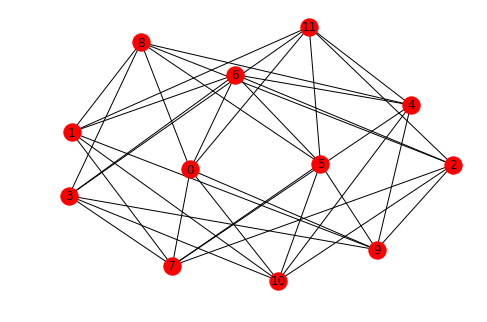

maxcut0 is  [6, 7, 8, 9, 10, 11]
maxcut1 is  [0, 1, 2, 3, 4, 5]


In [66]:
#draw graph
G = nx.Graph()
G.add_edges_from(graphs)
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
plt.show()
print("maxcut0 is ",mxcutlist0)
print("maxcut1 is ",mxcutlist1)

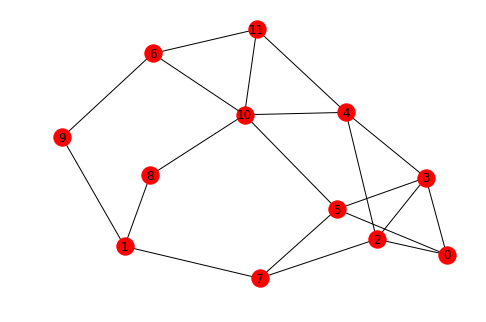

In [67]:
import random
random.seed()
init = random.randrange(1, 1000)
G01 = nx.erdos_renyi_graph(n=12, p=0.3, seed=init)
pos = nx.spring_layout(G01)
nx.draw(G01,pos,with_labels=True)
plt.show()